In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('train.xlsx')

In [3]:
df.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18,target
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77,B37
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63,B61
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77,A19
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73,A22
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80,A33


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36752 entries, 0 to 36751
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   T1      36752 non-null  int64 
 1   T2      36752 non-null  int64 
 2   T3      36752 non-null  int64 
 3   T4      36752 non-null  int64 
 4   T5      36752 non-null  int64 
 5   T6      36752 non-null  int64 
 6   T7      36752 non-null  int64 
 7   T8      36752 non-null  int64 
 8   T9      36752 non-null  int64 
 9   T10     36752 non-null  int64 
 10  T11     36752 non-null  int64 
 11  T12     36752 non-null  int64 
 12  T13     36752 non-null  int64 
 13  T14     36752 non-null  int64 
 14  T15     36752 non-null  int64 
 15  T16     36752 non-null  int64 
 16  T17     36752 non-null  int64 
 17  T18     36752 non-null  int64 
 18  target  36752 non-null  object
dtypes: int64(18), object(1)
memory usage: 5.3+ MB


In [5]:
features= df[['T1', 'T2', 'T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16','T17','T18']]
target = df['target']

In [6]:
features.head()

,T1,T2,T3,T4,T5,T6,T7,T8,T9,T10,T11,T12,T13,T14,T15,T16,T17,T18
0,-70,-61,-66,-53,-51,-63,-82,-57,-76,-78,-66,-66,-61,-59,-73,-75,-63,-77
1,-77,-74,-71,-76,-65,-63,-66,-52,-55,-75,-72,-75,-74,-61,-64,-63,-53,-63
2,-53,-38,-55,-66,-62,-62,-65,-70,-62,-52,-56,-53,-66,-68,-72,-60,-68,-77
3,-72,-62,-59,-65,-65,-65,-78,-82,-83,-59,-84,-60,-64,-83,-69,-72,-95,-73
4,-67,-69,-65,-63,-59,-53,-70,-72,-71,-60,-61,-57,-54,-76,-61,-66,-71,-80


In [7]:
target.head()

0    B37
1    B61
2    A19
3    A22
4    A33
Name: target, dtype: object

In [8]:
scaler = StandardScaler()
df = scaler.fit_transform(features)


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

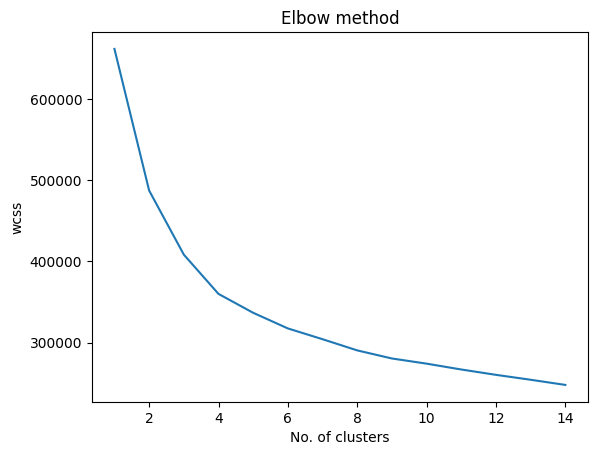

In [9]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,15),wcss)
plt.title('Elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('wcss')
plt.show()

In [10]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df)


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=4, random_state=42)

In [11]:
centroids = kmeans.cluster_centers_

In [12]:
clusters = kmeans.predict(df)

clusters

array([1, 0, 1, ..., 3, 3, 2])

In [13]:
def predict_cluster(new_data_point, scaler, kmeans):
    new_data_point = scaler.transform([new_data_point])
    
    cluster = kmeans.predict(new_data_point)[0]
    
    centroid = centroids[cluster]
    
    distance = np.linalg.norm(new_data_point - centroid)
    
    return cluster, distance

Prediction

In [14]:
new_data_point = [-67,-50,-65,-63,-59,-53,-70,-72,-61,-40,-61,-57,-54,-76,-61,-66,-71,-80]

cluster, distance = predict_cluster(new_data_point, scaler, kmeans)
print(f"The new data point belongs to cluster {cluster} with a distance of {distance} from the centroid.")


The new data point belongs to cluster 1 with a distance of 3.2321012970254106 from the centroid.


C:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
